# This notebook plots rain rate PDF from GPM DPR and IMERG v6 & v7
The data is produced by:
/src/calc_gpm_dpr_imerg_match_rainrate_pdf.py

In [1]:
import time
import numpy as np
import xarray as xr
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline

In [16]:
PHASE = 'Summer'
# PHASE = 'Winter'

# Specify regions
if PHASE == 'Summer':
    lon_bounds = [-180, 180]
    lat_bounds = [-15, 30]
    year = 2016
if PHASE == 'Winter':
    lon_bounds = [-180, 180]
    lat_bounds = [-20, 15]
    year = 2020
    
# Ocean vs. Land threshold (%)
ocean_thresh = 99
land_thresh = 20

dir_root = '/pscratch/sd/f/feng045/DYAMOND/'
dir_dpr = f'{dir_root}GPM_DYAMOND/DPR/'
file_dpr = f'{dir_dpr}rainrate_hist_{PHASE}_DPR.nc'

figdir = f'/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/{PHASE}/figures/MCSMIP/'
print(figdir)

/global/cfs/cdirs/m1867/zfeng/MCSMIP/DYAMOND/Summer/figures/MCSMIP/


In [3]:
# Read DPR file
ds = xr.open_dataset(file_dpr)
bins_pcp_c = ds.bins_pcp
lon_bounds = ds.attrs['lon_bounds']
lat_bounds = ds.attrs['lat_bounds']
ds

<xarray.Dataset>
Dimensions:                   (bins_pcp: 299)
Coordinates:
  * bins_pcp                  (bins_pcp) int64 1 2 3 4 5 ... 295 296 297 298 299
Data variables: (12/22)
    total_pcp_dpr             (bins_pcp) int64 ...
    total_pcp_imerg_v6_in     (bins_pcp) int64 ...
    total_pcp_imerg_v7_in     (bins_pcp) int64 ...
    total_pcp_imerg_v6_out    (bins_pcp) int64 ...
    total_pcp_imerg_v7_out    (bins_pcp) int64 ...
    total_pcp_o_dpr           (bins_pcp) int64 ...
    ...                        ...
    mcs_pcp_o_dpr             (bins_pcp) int64 ...
    mcs_pcp_o_imerg_v6        (bins_pcp) int64 ...
    mcs_pcp_o_imerg_v7        (bins_pcp) int64 ...
    mcs_pcp_l_dpr             (bins_pcp) int64 ...
    mcs_pcp_l_imerg_v6        (bins_pcp) int64 ...
    mcs_pcp_l_imerg_v7        (bins_pcp) int64 ...
Attributes:
    title:       GPM DPR precipitation histogram
    lon_bounds:  [-180  180]
    lat_bounds:  [-15  30]
    contact:     Zhe Feng, zhe.feng@pnnl.gov
    created_on:  Tue Jun  4 23:39:28 2024

## Calculate PDF

In [4]:
pcp_dpr_pdf = ds.total_pcp_dpr / np.nansum(ds.total_pcp_dpr)

pcp_dpr_o_pdf = ds.total_pcp_o_dpr / np.nansum(ds.total_pcp_o_dpr)
pcp_dpr_l_pdf = ds.total_pcp_l_dpr / np.nansum(ds.total_pcp_l_dpr)

mcspcp_dpr_o_pdf = ds.mcs_pcp_o_dpr / np.nansum(ds.mcs_pcp_o_dpr)
mcspcp_dpr_l_pdf = ds.mcs_pcp_l_dpr / np.nansum(ds.mcs_pcp_l_dpr)

In [5]:
pcp_imerg_v6_in_pdf = ds.total_pcp_imerg_v6_in / np.nansum(ds.total_pcp_imerg_v6_in)
pcp_imerg_v6_out_pdf = ds.total_pcp_imerg_v6_out / np.nansum(ds.total_pcp_imerg_v6_out)

pcp_imerg_v6_o_in_pdf = ds.total_pcp_o_imerg_v6_in / np.nansum(ds.total_pcp_o_imerg_v6_in)
pcp_imerg_v6_o_out_pdf = ds.total_pcp_o_imerg_v6_out / np.nansum(ds.total_pcp_o_imerg_v6_out)

pcp_imerg_v6_l_in_pdf = ds.total_pcp_l_imerg_v6_in / np.nansum(ds.total_pcp_l_imerg_v6_in)
pcp_imerg_v6_l_out_pdf = ds.total_pcp_l_imerg_v6_out / np.nansum(ds.total_pcp_l_imerg_v6_out)

mcspcp_imerg_v6_o_pdf = ds.mcs_pcp_o_imerg_v6 / np.nansum(ds.mcs_pcp_o_imerg_v6)
mcspcp_imerg_v6_l_pdf = ds.mcs_pcp_l_imerg_v6 / np.nansum(ds.mcs_pcp_l_imerg_v6)

In [6]:
pcp_imerg_v7_in_pdf = ds.total_pcp_imerg_v7_in / np.nansum(ds.total_pcp_imerg_v7_in)
pcp_imerg_v7_out_pdf = ds.total_pcp_imerg_v7_out / np.nansum(ds.total_pcp_imerg_v7_out)

pcp_imerg_v7_o_in_pdf = ds.total_pcp_o_imerg_v7_in / np.nansum(ds.total_pcp_o_imerg_v7_in)
pcp_imerg_v7_o_out_pdf = ds.total_pcp_o_imerg_v7_out / np.nansum(ds.total_pcp_o_imerg_v7_out)

pcp_imerg_v7_l_in_pdf = ds.total_pcp_l_imerg_v7_in / np.nansum(ds.total_pcp_l_imerg_v7_in)
pcp_imerg_v7_l_out_pdf = ds.total_pcp_l_imerg_v7_out / np.nansum(ds.total_pcp_l_imerg_v7_out)

mcspcp_imerg_v7_o_pdf = ds.mcs_pcp_o_imerg_v7 / np.nansum(ds.mcs_pcp_o_imerg_v7)
mcspcp_imerg_v7_l_pdf = ds.mcs_pcp_l_imerg_v7 / np.nansum(ds.mcs_pcp_l_imerg_v7)

## Compute precipitation fractional contribution by rain rate

In [7]:
# Multiply histogram by bin value to get total amount of rain for each bin
imerg_v6_amt_in_hist = ds.total_pcp_imerg_v6_in * bins_pcp_c
imerg_v7_amt_in_hist = ds.total_pcp_imerg_v7_in * bins_pcp_c
imerg_v6_amt_out_hist = ds.total_pcp_imerg_v6_out * bins_pcp_c
imerg_v7_amt_out_hist = ds.total_pcp_imerg_v7_out * bins_pcp_c
dpr_amt_hist = ds.total_pcp_dpr * bins_pcp_c

# Get fractional contribution by dividing the sum of all rain bins
imerg_v6_amt_in_frac = imerg_v6_amt_in_hist / imerg_v6_amt_in_hist.sum()
imerg_v7_amt_in_frac = imerg_v7_amt_in_hist / imerg_v7_amt_in_hist.sum()
imerg_v6_amt_out_frac = imerg_v6_amt_out_hist / imerg_v6_amt_out_hist.sum()
imerg_v7_amt_out_frac = imerg_v7_amt_out_hist / imerg_v7_amt_out_hist.sum()
dpr_amt_frac = dpr_amt_hist / dpr_amt_hist.sum()

In [8]:
# Multiply histogram by bin value to get total amount of rain for each bin
dpr_mcsamt_o_hist = ds.mcs_pcp_o_dpr * bins_pcp_c
dpr_mcsamt_l_hist = ds.mcs_pcp_l_dpr * bins_pcp_c
imerg_v6_mcsamt_o_hist = ds.mcs_pcp_o_imerg_v6 * bins_pcp_c
imerg_v6_mcsamt_l_hist = ds.mcs_pcp_l_imerg_v6 * bins_pcp_c
imerg_v7_mcsamt_o_hist = ds.mcs_pcp_o_imerg_v7 * bins_pcp_c
imerg_v7_mcsamt_l_hist = ds.mcs_pcp_l_imerg_v7 * bins_pcp_c

# Get fractional contribution by dividing the sum of all rain bins
dpr_mcsamt_frac_o = dpr_mcsamt_o_hist / dpr_mcsamt_o_hist.sum()
dpr_mcsamt_frac_l = dpr_mcsamt_l_hist / dpr_mcsamt_l_hist.sum()
imerg_v6_mcsamt_frac_o = imerg_v6_mcsamt_o_hist / imerg_v6_mcsamt_o_hist.sum()
imerg_v6_mcsamt_frac_l = imerg_v6_mcsamt_l_hist / imerg_v6_mcsamt_l_hist.sum()
imerg_v7_mcsamt_frac_o = imerg_v7_mcsamt_o_hist / imerg_v7_mcsamt_o_hist.sum()
imerg_v7_mcsamt_frac_l = imerg_v7_mcsamt_l_hist / imerg_v7_mcsamt_l_hist.sum()

In [9]:
# Make lat bound formats for plotting
lat_min = f'{-1*lat_bounds[0]}°S' if lat_bounds[0] < 0 else f'{lat_bounds[0]}°N'
lat_max = f'{-1*lat_bounds[1]}°S' if lat_bounds[1] < 0 else f'{lat_bounds[1]}°N'
f'({PHASE}, {lat_min} - {lat_max})'

'(Summer, 15°S - 30°N)'

In [10]:
if PHASE == 'Summer':
    panel_numbers = ['(a)','(c)']
elif PHASE == 'Winter':
    panel_numbers = ['(b)','(d)']
panel_numbers

['(a)', '(c)']

# Plot rain rate PDF

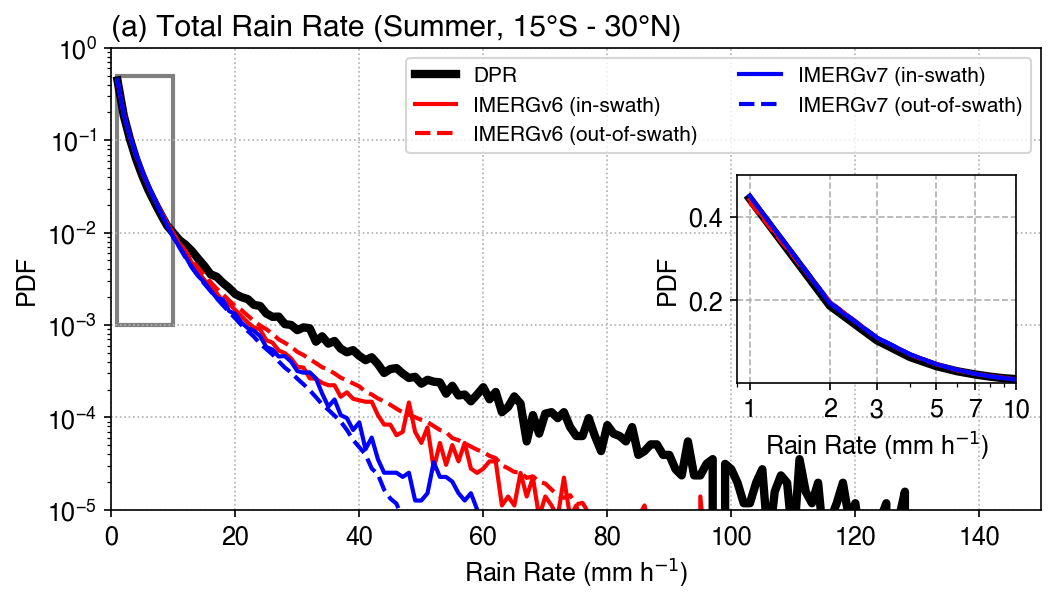

In [11]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Helvetica'
lw = 2
xlabels = 'Rain Rate (mm h$^{-1}$)'
ylabels = 'PDF'

fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=150)
ax.plot(bins_pcp_c, pcp_dpr_pdf, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, pcp_imerg_v6_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v6_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
ax.set_yscale('log')
ax.set_xlim(0, 150)
ax.set_ylim(1e-5, 1)
ax.grid(ls=':')
ax.legend(ncol=2, fontsize=10)
ax.set_xlabel(xlabels)
ax.set_ylabel(ylabels)
ax.set_title(f'{panel_numbers[0]} Total Rain Rate ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Inset plot
x_sub = (0.9, 10)
y_sub = (1e-3, 0.5)
yscale_sub = 'linear'
xscale_sub = 'log'
xticks_sub = [1, 2, 3, 5, 7, 10,]
box_color = 'gray'
line_width = 2
width = '30%'
height = '45%'
loc = 'center right'
borderpad = 1
# Create the inset plot
axins = inset_axes(ax, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, pcp_dpr_pdf, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, pcp_imerg_v6_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v6_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)

figname = f'{figdir}global_total_pcp_pdf_dpr_imerg.png'
fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')

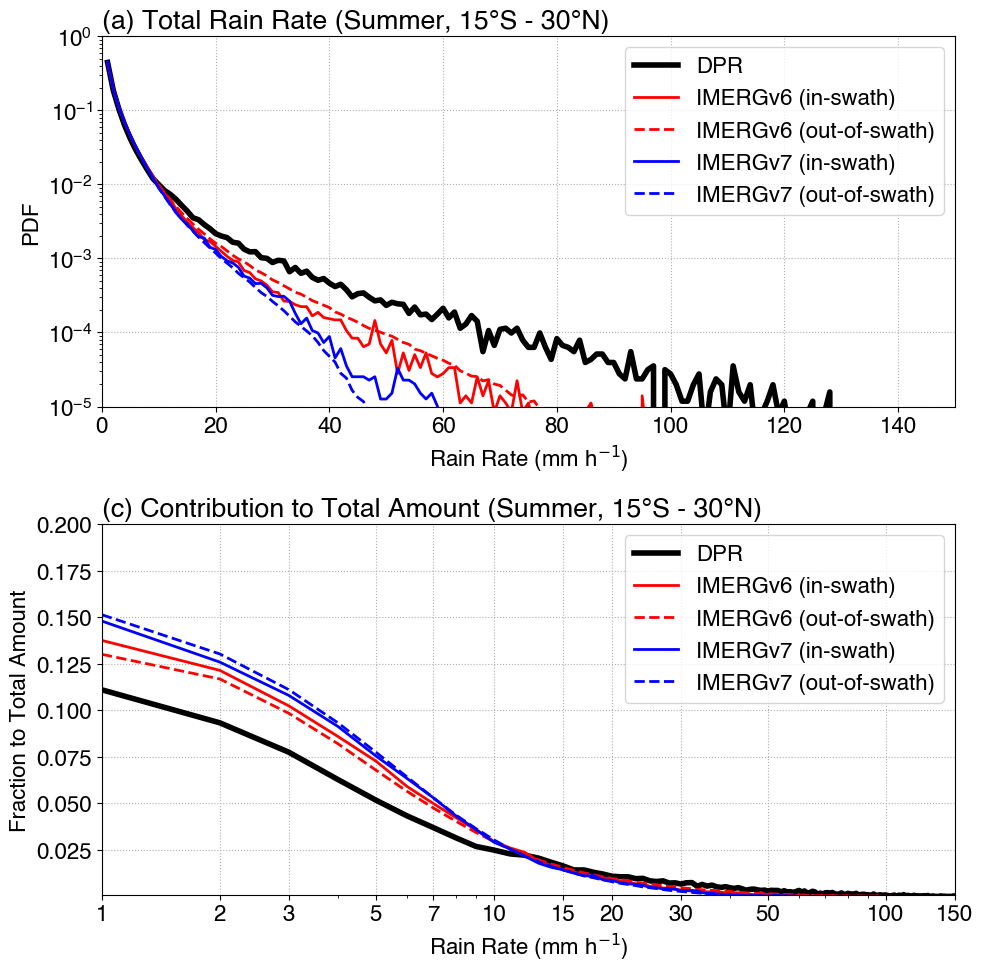

In [12]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
lw = 2
xticks = [1,2,3,5,7,10,15,20,30,50,100,150]

fig, axes = plt.subplots(2, 1, figsize=(10,10), dpi=100)
ax = axes[0]
ax.plot(bins_pcp_c, pcp_dpr_pdf, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, pcp_imerg_v6_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v6_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0, 150)
ax.set_ylim(1e-5, 1)
# ax.set_xticks(xticks)
# ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid(ls=':')
ax.legend()
ax.set_xlabel('Rain Rate (mm h$^{-1}$)')
ax.set_ylabel('PDF')
ax.set_title(f'{panel_numbers[0]} Total Rain Rate ({PHASE}, {lat_min} - {lat_max})', loc='left')

ax = axes[1]
ax.plot(bins_pcp_c, dpr_amt_frac, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, imerg_v6_amt_in_frac, color='r', lw=lw, label='IMERGv6 (in-swath)')
ax.plot(bins_pcp_c, imerg_v6_amt_out_frac, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
ax.plot(bins_pcp_c, imerg_v7_amt_in_frac, color='b', lw=lw, label='IMERGv7 (in-swath)')
ax.plot(bins_pcp_c, imerg_v7_amt_out_frac, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(1, 150)
ax.set_ylim(1e-3, 0.2)
ax.set_xticks(xticks)
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid(ls=':')
ax.legend()
ax.set_xlabel('Rain Rate (mm h$^{-1}$)')
ax.set_ylabel('Fraction to Total Amount')
ax.set_title(f'{panel_numbers[1]} Contribution to Total Amount ({PHASE}, {lat_min} - {lat_max})', loc='left')

fig.tight_layout()
figname = f'{figdir}global_total_pcp_fractional_pdf_dpr_imerg.png'
fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')

/tmp/ipykernel_1267403/1120811692.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


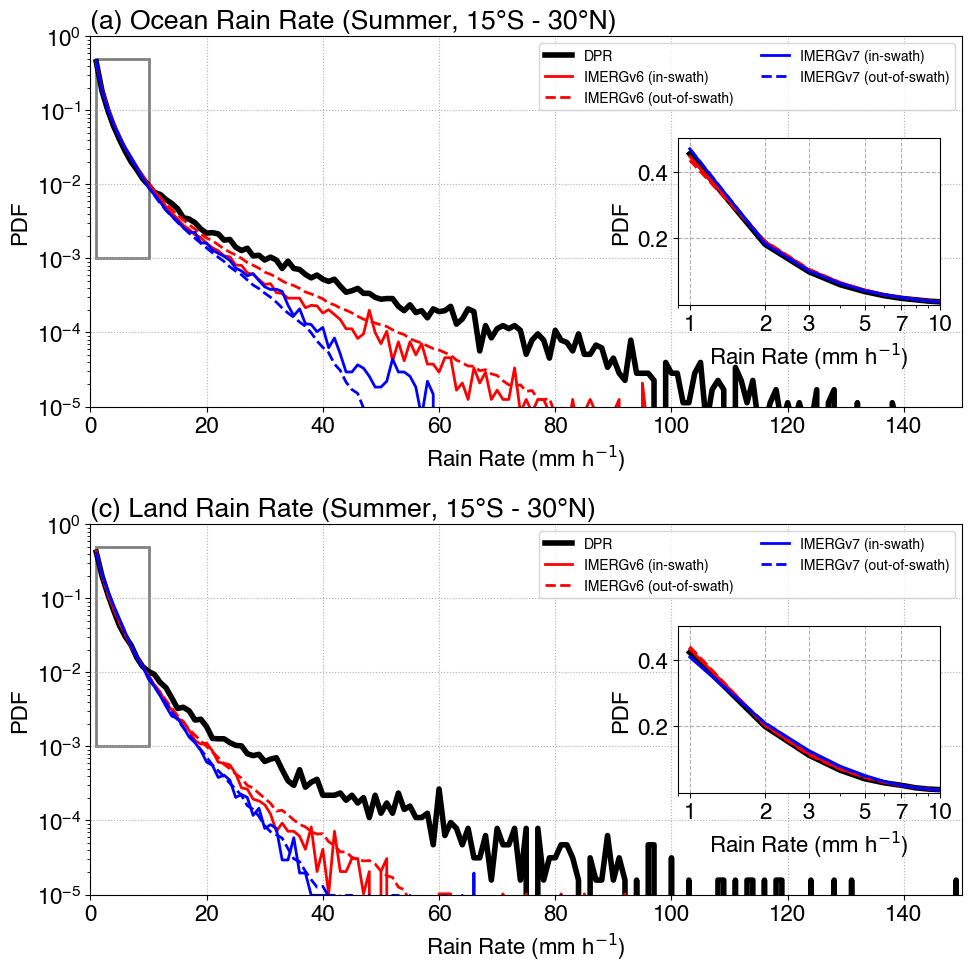

In [13]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
lw = 2
xlabels = 'Rain Rate (mm h$^{-1}$)'
ylabels = 'PDF'
x_sub = (0.9, 10)
y_sub = (1e-3, 0.5)
yscale_sub = 'linear'
xscale_sub = 'log'
xticks_sub = [1, 2, 3, 5, 7, 10,]
box_color = 'gray'
line_width = 2
width = '30%'
height = '45%'
loc = 'center right'
borderpad = 1

fig, axes = plt.subplots(2, 1, figsize=(10,10), dpi=100)
ax = axes[0]
ax.plot(bins_pcp_c, pcp_dpr_o_pdf, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, pcp_imerg_v6_o_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v6_o_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_o_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_o_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0, 150)
ax.set_ylim(1e-5, 1)
# ax.set_xticks(xticks)
# ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid(ls=':')
ax.legend(ncol=2, fontsize=10)
ax.set_xlabel(xlabels)
ax.set_ylabel(ylabels)
ax.set_title(f'{panel_numbers[0]} Ocean Rain Rate ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Create the inset plot
axins = inset_axes(ax, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, pcp_dpr_o_pdf, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, pcp_imerg_v6_o_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v6_o_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_o_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_o_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)


#------------------------------------------------
ax = axes[1]
ax.plot(bins_pcp_c, pcp_dpr_l_pdf, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, pcp_imerg_v6_l_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v6_l_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_l_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
ax.plot(bins_pcp_c, pcp_imerg_v7_l_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0, 150)
ax.set_ylim(1e-5, 1)
# ax.set_xticks(xticks)
# ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid(ls=':')
ax.legend(ncol=2, fontsize=10)
ax.set_xlabel(xlabels)
ax.set_ylabel(ylabels)
ax.set_title(f'{panel_numbers[1]} Land Rain Rate ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Create the inset plot
axins = inset_axes(ax, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, pcp_dpr_l_pdf, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, pcp_imerg_v6_l_in_pdf, color='r', lw=lw, label='IMERGv6 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v6_l_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_l_in_pdf, color='b', lw=lw, label='IMERGv7 (in-swath)')
axins.plot(bins_pcp_c, pcp_imerg_v7_l_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)

fig.tight_layout()
figname = f'{figdir}global_total_pcp_fractional_pdf_dpr_imerg_ocean_land.png'
fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')

/tmp/ipykernel_1267403/1626637856.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


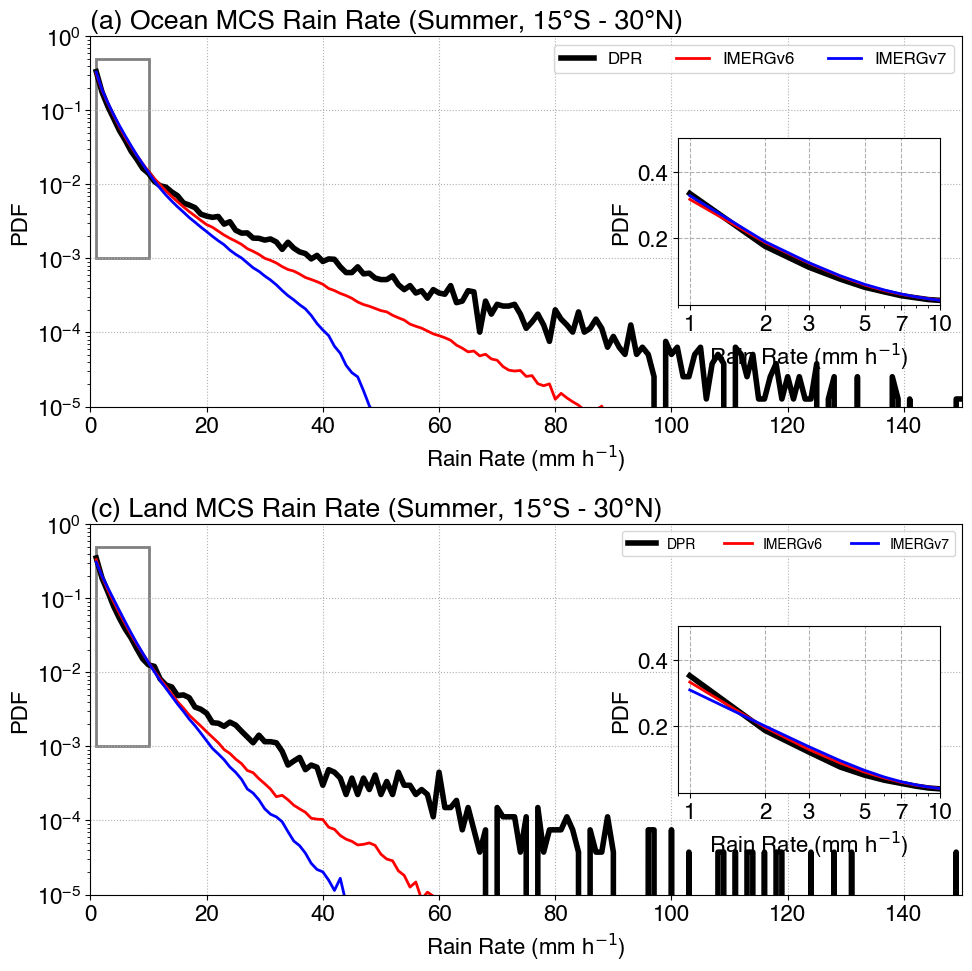

In [14]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
lw = 2
xlabels = 'Rain Rate (mm h$^{-1}$)'
ylabels = 'PDF'
x_sub = (0.9, 10)
y_sub = (1e-3, 0.5)
yscale_sub = 'linear'
xscale_sub = 'log'
xticks_sub = [1, 2, 3, 5, 7, 10,]
box_color = 'gray'
line_width = 2
width = '30%'
height = '45%'
loc = 'center right'
borderpad = 1

fig, axes = plt.subplots(2, 1, figsize=(10,10), dpi=100)
ax = axes[0]
ax.plot(bins_pcp_c, mcspcp_dpr_o_pdf, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, mcspcp_imerg_v6_o_pdf, color='r', lw=lw, label='IMERGv6')
# ax.plot(bins_pcp_c, pcp_imerg_v6_o_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
ax.plot(bins_pcp_c, mcspcp_imerg_v7_o_pdf, color='b', lw=lw, label='IMERGv7')
# ax.plot(bins_pcp_c, pcp_imerg_v7_o_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0, 150)
ax.set_ylim(1e-5, 1)
# ax.set_xticks(xticks)
# ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid(ls=':')
ax.legend(ncol=3, fontsize=12)
ax.set_xlabel(xlabels)
ax.set_ylabel(ylabels)
ax.set_title(f'{panel_numbers[0]} Ocean MCS Rain Rate ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Create the inset plot
axins = inset_axes(ax, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, mcspcp_dpr_o_pdf, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, mcspcp_imerg_v6_o_pdf, color='r', lw=lw, label='IMERGv6')
# axins.plot(bins_pcp_c, pcp_imerg_v6_o_out_pdf, color='r', lw=lw, ls='--', label='IMERGv6 (out-of-swath)')
axins.plot(bins_pcp_c, mcspcp_imerg_v7_o_pdf, color='b', lw=lw, label='IMERGv7')
# axins.plot(bins_pcp_c, pcp_imerg_v7_o_out_pdf, color='b', ls='--', lw=lw, label='IMERGv7 (out-of-swath)')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)


#------------------------------------------------
ax = axes[1]
ax.plot(bins_pcp_c, mcspcp_dpr_l_pdf, color='k', lw=lw*2, label='DPR')
ax.plot(bins_pcp_c, mcspcp_imerg_v6_l_pdf, color='r', lw=lw, label='IMERGv6')
ax.plot(bins_pcp_c, mcspcp_imerg_v7_l_pdf, color='b', lw=lw, label='IMERGv7')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0, 150)
ax.set_ylim(1e-5, 1)
# ax.set_xticks(xticks)
# ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.grid(ls=':')
ax.legend(ncol=3, fontsize=10)
ax.set_xlabel(xlabels)
ax.set_ylabel(ylabels)
ax.set_title(f'{panel_numbers[1]} Land MCS Rain Rate ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Create the inset plot
axins = inset_axes(ax, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, mcspcp_dpr_l_pdf, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, mcspcp_imerg_v6_l_pdf, color='r', lw=lw, label='IMERGv6')
axins.plot(bins_pcp_c, mcspcp_imerg_v7_l_pdf, color='b', lw=lw, label='IMERGv7')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)

fig.tight_layout()
figname = f'{figdir}global_mcs_pcp_pdf_dpr_imerg_ocean_land.png'
fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')

/tmp/ipykernel_1267403/3967265597.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


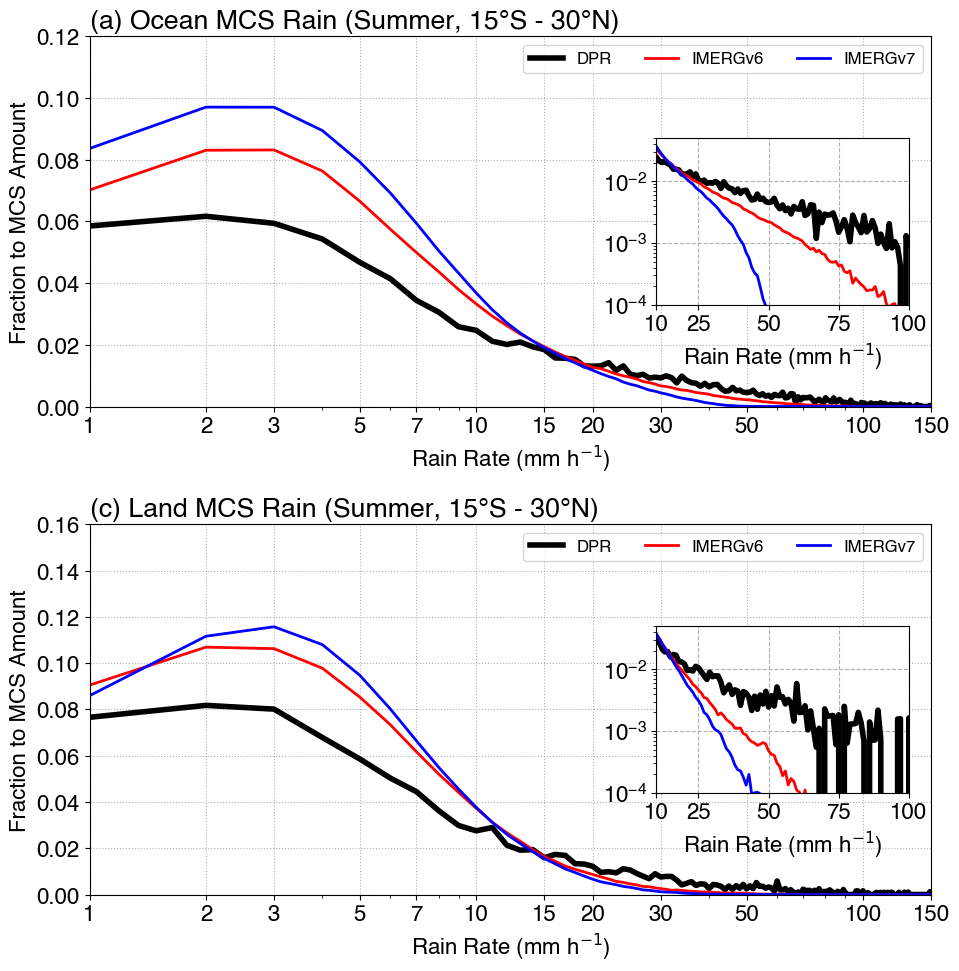

In [15]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Helvetica'
lw = 2
xlabels = 'Rain Rate (mm h$^{-1}$)'
ylabels = 'Fraction to MCS Amount'
xticks = [1,2,3,5,7,10,15,20,30,50,100,150]
# x_sub = (0.9, 10)
x_sub = (10, 100)
y_sub = (1e-4, 0.05)
# y_sub = (1e-3, 0.5)
yscale_sub = 'log'
xscale_sub = 'linear'
# xticks_sub = [1, 2, 3, 5, 7, 10,]
xticks_sub = [10,25,50,75,100]
box_color = 'gray'
line_width = 2
width = '30%'
height = '45%'
loc = 'center right'
borderpad = 1

fig, axes = plt.subplots(2, 1, figsize=(10,10), dpi=100)
ax0 = axes[0]
ax0.plot(bins_pcp_c, dpr_mcsamt_frac_o, color='k', lw=lw*2, label='DPR')
ax0.plot(bins_pcp_c, imerg_v6_mcsamt_frac_o, color='r', lw=lw, label='IMERGv6')
ax0.plot(bins_pcp_c, imerg_v7_mcsamt_frac_o, color='b', lw=lw, label='IMERGv7')
ax0.set_xscale('log')
# ax0.set_yscale('log')
ax0.set_xlim(1, 150)
ax0.set_ylim(0, 0.12)
ax0.set_xticks(xticks)
ax0.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax0.grid(ls=':')
ax0.legend(ncol=3, fontsize=12)
ax0.set_xlabel(xlabels)
ax0.set_ylabel(ylabels)
ax0.set_title(f'{panel_numbers[0]} Ocean MCS Rain ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Create the inset plot
axins = inset_axes(ax0, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, dpr_mcsamt_frac_o, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, imerg_v6_mcsamt_frac_o, color='r', lw=lw, label='IMERGv6')
axins.plot(bins_pcp_c, imerg_v7_mcsamt_frac_o, color='b', lw=lw, label='IMERGv7')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
# axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
# axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)


#------------------------------------------------
ax1 = axes[1]
ax1.plot(bins_pcp_c, dpr_mcsamt_frac_l, color='k', lw=lw*2, label='DPR')
ax1.plot(bins_pcp_c, imerg_v6_mcsamt_frac_l, color='r', lw=lw, label='IMERGv6')
ax1.plot(bins_pcp_c, imerg_v7_mcsamt_frac_l, color='b', lw=lw, label='IMERGv7')
ax1.set_xscale('log')
# ax.set_yscale('log')
ax1.set_xlim(1, 150)
ax1.set_ylim(0, 0.16)
ax1.set_xticks(xticks)
ax1.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax1.grid(ls=':')
ax1.legend(ncol=3, fontsize=12)
ax1.set_xlabel(xlabels)
ax1.set_ylabel(ylabels)
ax1.set_title(f'{panel_numbers[1]} Land MCS Rain ({PHASE}, {lat_min} - {lat_max})', loc='left')

# Create the inset plot
axins = inset_axes(ax1, width=width, height=height, loc=loc, borderpad=borderpad)
axins.plot(bins_pcp_c, dpr_mcsamt_frac_l, color='k', lw=lw*2, label='DPR')
axins.plot(bins_pcp_c, imerg_v6_mcsamt_frac_l, color='r', lw=lw, label='IMERGv6')
axins.plot(bins_pcp_c, imerg_v7_mcsamt_frac_l, color='b', lw=lw, label='IMERGv7')
axins.set_xlim(x_sub[0], x_sub[1])
axins.set_ylim(y_sub[0], y_sub[1])
axins.set_xscale(xscale_sub)
axins.set_yscale(yscale_sub)
axins.set_xlabel(xlabels)
# axins.set_ylabel(ylabels)
axins.set_xticks(xticks_sub)
# axins.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axins.grid(which='major', ls='--')
# Add rectangle indicating the zoomed region in the main plot
rect = plt.Rectangle((x_sub[0], y_sub[0]), x_sub[1] - x_sub[0], y_sub[1] - y_sub[0], linewidth=line_width, edgecolor=box_color, facecolor='none')
ax.add_patch(rect)

fig.tight_layout()
figname = f'{figdir}global_mcs_pcp_fractional_pdf_dpr_imerg_ocean_land.png'
fig.savefig(figname, bbox_inches='tight', dpi=300, facecolor='w')